n = 1
Time: 0.03700137138366699
Memory: 56
n = 2
Time: 0.039999961853027344
Memory: 56
n = 3
Time: 0.04400062561035156
Memory: 56
n = 4
Time: 0.04199624061584473
Memory: 56
n = 5
Time: 0.046523094177246094
Memory: 56
n = 6
Time: 0.049994707107543945
Memory: 56
n = 7
Time: 0.047005653381347656
Memory: 56
n = 8
Time: 0.04399609565734863
Memory: 56
n = 9
Time: 0.04599714279174805
Memory: 56
n = 10
Time: 0.04378509521484375
Memory: 56
n = 11
Time: 0.04500079154968262
Memory: 56
n = 12
Time: 0.05153703689575195
Memory: 56
n = 13
Time: 0.04600048065185547
Memory: 56
n = 14
Time: 0.04800105094909668
Memory: 56
n = 15
Time: 0.05000042915344238
Memory: 56
n = 16
Time: 0.05397439002990723
Memory: 56
n = 17
Time: 0.06952261924743652
Memory: 56
n = 18
Time: 0.06299972534179688
Memory: 56
n = 19
Time: 0.05700039863586426
Memory: 56
n = 20
Time: 0.0587925910949707
Memory: 56
n = 21
Time: 0.0540013313293457
Memory: 56
n = 22
Time: 0.059000492095947266
Memory: 56
n = 23
Time: 0.06100058555603027
Memor

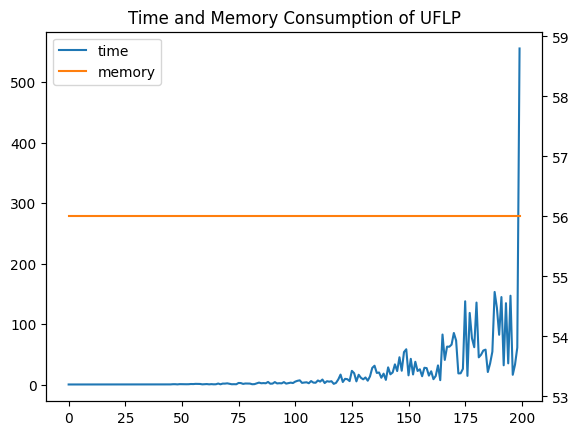

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add the project root directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from lp.uflp import UFLP

n = 1
n_max = 200
time_records = []
memory_records = []
while n <= n_max:
    print('n =', n)
    uflp = UFLP(
        h_i=np.random.randint(1, 20, n),
        c_ij=np.random.randint(1, 10, (n, n)),
        f_j=np.random.randint(1, 10, n)
    )
    uflp.load_to_pulp()
    uflp.solve_by_pulp()
    time_records.append(uflp.pulp_model.solutionTime)
    memory_records.append(sys.getsizeof(uflp.pulp_model))
    print('Time:', uflp.pulp_model.solutionTime)
    print('Memory:', sys.getsizeof(uflp.pulp_model))

    n += 1
    del uflp

df = pd.DataFrame({
    'time': time_records,
    'memory': memory_records
})
graph = df[['time', 'memory']].plot(
    title='Time and Memory Consumption of UFLP',
    secondary_y='memory',
    mark_right=False)
# clear memory
del df
del graph
del time_records
del memory_records

